# SETD2
SETD2 is the primary methyltransferase catalyzing H3K36 trimethylation (H3K36me3).
Pathogenic variants in SETD2 are observed in
[Intellectual developmental disorder, autosomal dominant 70	(OMIM:620157)](https://omim.org/entry/620157),
[Luscan-Lumish syndrome	(OMIM:616831)](https://omim.org/entry/616831), and
[Rabin-Pappas syndrome	(OMIM:620155)](https://omim.org/entry/620155).

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### SETD2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SETD2.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'SETD2'
mane_tx_id = 'NM_014159.7'
mane_protein_id = 'NP_054878.5' # histone-lysine N-methyltransferase SETD2 isoform 1 [Homo sapiens]
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.24') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc_results = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
qc_results.summarize()

Individuals Processed: 100%|██████████| 45/45 [00:00<00:00, 149.17 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
29,Delayed speech and language development
19,Macrocephaly
19,Global developmental delay
16,Hypertelorism
14,Hypotonia
12,Autistic behavior
11,Wide nasal bridge
11,Obesity
11,Micrognathia
11,Highly arched eyebrow


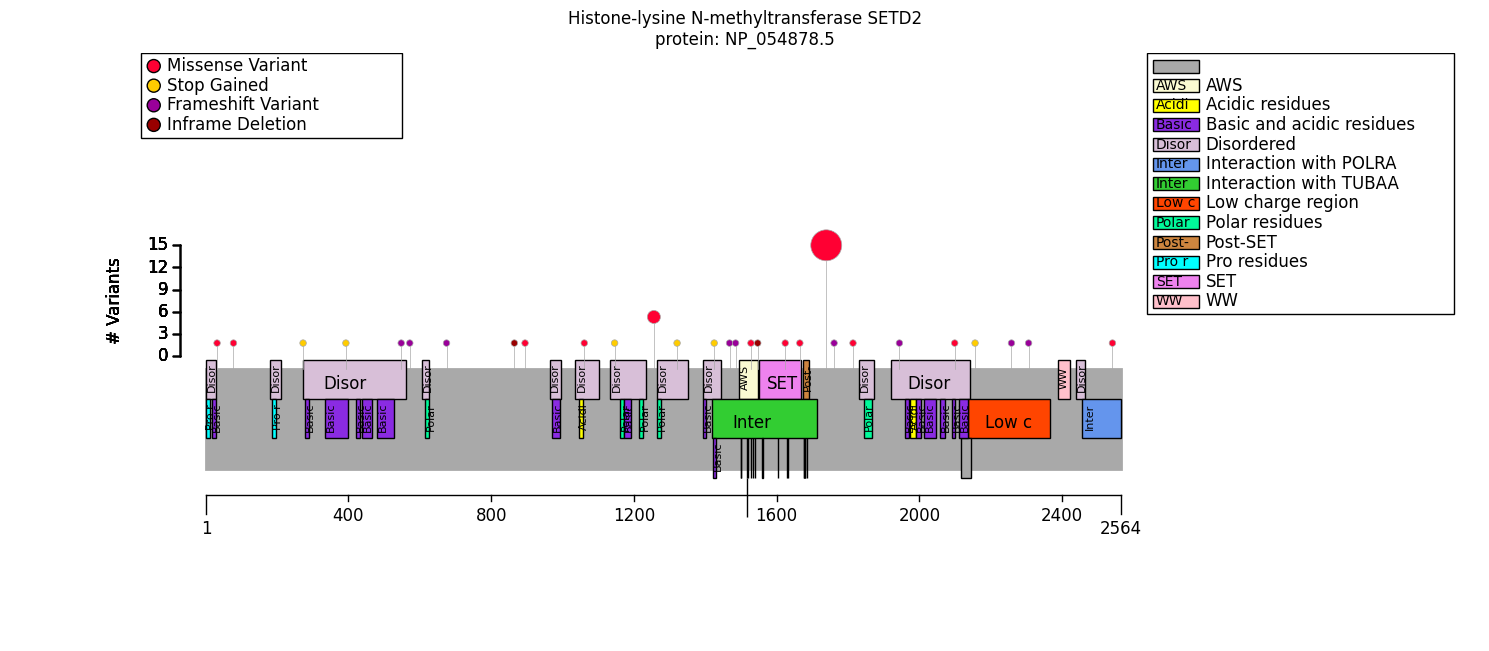

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

setd2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
setd2_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_key

r1740w = variant_key(key="3_47088172_47088172_G_A") # c.5218C>T	p.Arg1740Trp	
r1740q = variant_key(key="3_47088171_47088171_C_T") # c.5219G>A	p.Arg1740Gln

r1740w_clf = monoallelic_classifier(
    a_predicate=r1740w, 
    b_predicate=~r1740w, 
    a_label="Arg1740Trp",
    b_label="Other")

r1740w_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r1740w_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(r1740w_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,6
Skipping term because one genotype had zero observations,7
"Skipping ""general"" level terms",104
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),490


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=r1740w_result)

Allele group,Arg1740Trp,Other,Corrected p values,p values
Severe global developmental delay [HP:0011344],9/9 (100%),0/12 (0%),0.000116,0.000003
Hypertelorism [HP:0000316],11/11 (100%),5/23 (22%),0.000260,0.000015
Macrocephaly [HP:0000256],0/11 (0%),19/28 (68%),0.001647,0.000145
Delayed ability to walk [HP:0031936],8/8 (100%),1/10 (10%),0.003497,0.000411
Scoliosis [HP:0002650],6/6 (100%),2/14 (14%),0.004912,0.000722
Wide nasal bridge [HP:0000431],9/9 (100%),2/9 (22%),0.012173,0.002262
Ventriculomegaly [HP:0002119],4/4 (100%),2/17 (12%),0.012173,0.002506
Motor delay [HP:0001270],8/8 (100%),6/13 (46%),0.076316,0.017957
Global developmental delay [HP:0001263],9/9 (100%),19/31 (61%),0.137175,0.037476
Obesity [HP:0001513],0/9 (0%),11/30 (37%),0.137175,0.040346


In [9]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(effect=VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_clf = monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
     pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,Missense,Other,Corrected p values,p values
Macrocephaly [HP:0000256],4/24 (17%),15/15 (100%),0.000006,1.541715e-07
Scoliosis [HP:0002650],8/13 (62%),0/7 (0%),0.236051,1.465428e-02
Hypertelorism [HP:0000316],13/20 (65%),3/14 (21%),0.236051,1.727201e-02
Hypotonia [HP:0001252],5/13 (38%),9/11 (82%),0.402734,4.717997e-02
Wide nasal bridge [HP:0000431],9/11 (82%),2/7 (29%),0.402734,4.911388e-02
Prominent forehead [HP:0011220],1/9 (11%),7/13 (54%),0.507740,7.430341e-02
Obesity [HP:0001513],4/23 (17%),7/16 (44%),0.780952,1.461149e-01
Intellectual disability [HP:0001249],2/7 (29%),8/12 (67%),0.780952,1.698023e-01
Ventriculomegaly [HP:0002119],5/12 (42%),1/9 (11%),0.780952,1.777974e-01
Delayed ability to walk [HP:0031936],9/15 (60%),0/3 (0%),0.780952,2.058824e-01


In [10]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Autistic behavior [HP:0000729],7/7 (100%),5/12 (42%),0.375286,0.017405
Broad forehead [HP:0000337],5/6 (83%),4/17 (24%),0.375286,0.018307
Tall stature [HP:0000098],1/17 (6%),9/24 (38%),0.384014,0.028099
Ventriculomegaly [HP:0002119],5/10 (50%),1/11 (9%),0.650542,0.063467
Dandy-Walker malformation [HP:0001305],2/13 (15%),0/21 (0%),0.880850,0.139037
Wide nasal bridge [HP:0000431],8/10 (80%),3/8 (38%),0.880850,0.144796
Obesity [HP:0001513],2/15 (13%),9/24 (38%),0.880850,0.150389
Severe global developmental delay [HP:0011344],6/10 (60%),3/11 (27%),1.000000,0.198381
Short stature [HP:0004322],3/12 (25%),1/15 (7%),1.000000,0.294017
Intellectual disability [HP:0001249],2/6 (33%),8/13 (62%),1.000000,0.349845


In [11]:
from gpsea.analysis.temporal.endpoint import disease_onset
from gpsea.analysis.temporal.stats import LogRankTest
from gpsea.analysis.temporal import SurvivalAnalysis


idd70 = "OMIM:620157" # Intellectual developmental disorder, autosomal dominant 70
lls = "OMIM:616831" # Luscan-Lumish syndrome
rps = "OMIM:620155" # Rabin-Pappas syndrome
# Test onset of LLS, with 28 individuals

lls_onset = disease_onset(disease_id=lls)

survival_statistic = LogRankTest()
survival_analysis = SurvivalAnalysis(
    statistic=survival_statistic,
)
lls_missense_onset_result = survival_analysis.compare_genotype_vs_survival(
    cohort=cohort,
    gt_clf=missense_clf,
    endpoint=lls_onset,
)
print(f"LLS Onset vs. missense variant p={lls_missense_onset_result.pval:.5f}")

LLS Onset vs. missense variant p=0.00008


Text(2000, 0.5, '$p=0.00008$')

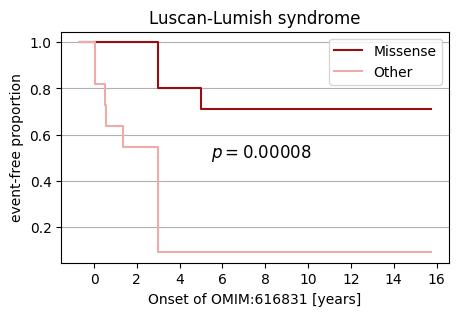

In [12]:
import matplotlib as mpl
from gpsea.model import Age

lls_onset_fig, ax = plt.subplots(figsize=(5, 3))
lls_missense_onset_result.plot_kaplan_meier_curves(ax=ax)
def days_to_years(x, pos):
    return f"{x / 365.25:.1f}"
_ = ax.xaxis.set(
    # Show X axis in years ...
    major_formatter=mpl.ticker.FuncFormatter(lambda x, pos: f"{x / Age.DAYS_IN_YEAR:.0f}"),
    # ... with a tick for every decade
    major_locator=mpl.ticker.MultipleLocator(2 * Age.DAYS_IN_YEAR),
)
_ = ax.set(
    xlabel=lls_onset.name + " [years]",
    ylabel="event-free proportion",
)
_ = ax.grid(axis="y")

ax.set_title("Luscan-Lumish syndrome")
s = f"p={lls_missense_onset_result.pval:.5f}"
ax.text(x=2000, y=0.5, s=f"${s}$", fontsize=12)

# Summary

In [13]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=r1740w_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

m_results = (
    GPAnalysisResultSummary.from_mono(
        result=lls_missense_onset_result,
    ),
)

caption = "The origin of clinical diversity in patients with SEC61A1 mutation is currently unclear. With our present patient set, a particular phenotype cannot be predicted on the basis of location or nature of the mutation (PMID:32325141)."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             mono_results=m_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [14]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [15]:
summarizer.process_latex(report=report, protein_fig=setd2_fig, stats_fig=lls_onset_fig)

Figure saved to ../../supplement/img/SETD2_protein_diagram-draft.pdf
Figure saved to ../../supplement/img/SETD2_stats-draft.pdf
Output to ../../supplement/tex/SETD2_summary_draft.tex
